In [1]:
#importing relevent libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
#importing datasets
users=pd.read_csv('users.dat',delimiter='::',names=['userid','gender','age','occupation','zip_code'])
ratings=pd.read_csv('ratings.dat',delimiter='::',names=['userid','movieid','rating','timestamp'])
movies=pd.read_csv('movies.dat',delimiter='::', names=['movieid','title','genres'],encoding='latin-1')


In [4]:
#merging datasets to create masterdata
master_data=pd.merge(movies.drop('genres',axis=1),ratings.drop('timestamp',axis=1),on='movieid')
master_data=pd.merge(master_data,users.drop('zip_code',axis=1),on='userid')
master_data.head(3)

,movieid,title,userid,rating,gender,age,occupation
0,1,Toy Story (1995),1,5,F,1,10
1,48,Pocahontas (1995),1,5,F,1,10
2,150,Apollo 13 (1995),1,5,F,1,10


In [5]:
#Saving user age distribution( in percent )in a dataframe
user_age_dist=(master_data['age'].value_counts(normalize=True)*100).to_frame().reset_index()
# Rounding the age column values to 2 digits after decimal
user_age_dist['age']=user_age_dist['age'].apply(lambda x:round(x,2))
user_age_dist
#comments:
#The age group "25-34"(25) have the highest frequency of around 39.55% in the master_data
#The age group "under 18"(1) have the lowest frequency of around 2.72% in the master_data

,index,age
0,25,39.55
1,35,19.90
2,18,18.35
3,45,8.36
4,50,7.25
5,56,3.88
6,1,2.72


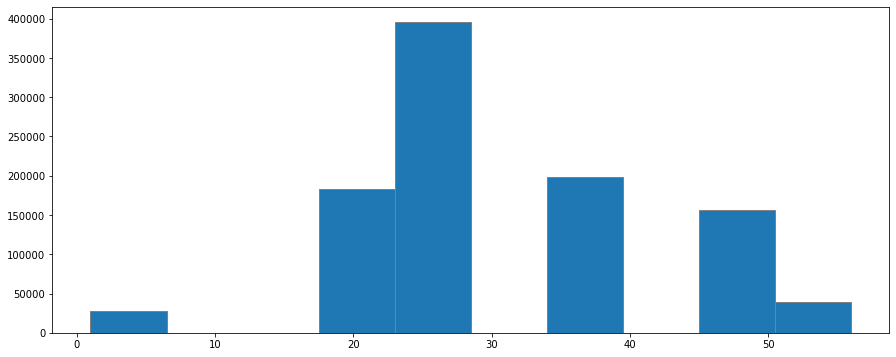

In [6]:
#Visual representaion of user age distribution via a Histrogram
plt.figure(figsize=(15,6))
plt.hist(master_data['age'],edgecolor='grey',align='mid')
plt.show()

In [7]:
#User rating of the movie “Toy Story”
print("Overall rating for the movie Toy Story is: ",(master_data.groupby('title')[['title','rating']].mean().round(decimals=2).loc['Toy Story (1995)']))

Overall rating for the movie Toy Story is:  rating    4.15
Name: Toy Story (1995), dtype: float64


In [8]:
#Top 25 movies by viewership rating
top_25_movies_byrating=master_data.groupby('title')[['title','rating']].mean().sort_values(by='rating',ascending=False).head(25)
top_25_movies_byrating


,rating
title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


In [9]:
#The ratings for all the movies reviewed by for a particular user of user id = 2696
master_data[master_data['userid']==2696][['userid','title','rating','gender']]

,userid,title,rating,gender
991035,2696,"Client, The (1994)",3,M
991036,2696,Lone Star (1996),5,M
991037,2696,Basic Instinct (1992),4,M
991038,2696,E.T. the Extra-Terrestrial (1982),3,M
991039,2696,"Shining, The (1980)",4,M
991040,2696,Back to the Future (1985),2,M
991041,2696,Cop Land (1997),3,M
991042,2696,L.A. Confidential (1997),4,M
991043,2696,"Game, The (1997)",4,M
991044,2696,I Know What You Did Last Summer (1997),2,M


## Feature Engineering:

In [10]:
#Finding All unique genres
genres=[]
x=movies['genres'].apply(lambda x:x.split('|'))
for i in x:
    genres.extend(i)
genres=set(genres)
genres
    

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [11]:
# Appending 'genres' column to the master_data
master_data=pd.merge(master_data,movies[['movieid','genres']],on='movieid')

In [12]:
#Creating a separate column for each genre category with a one-hot encoding whether or not the movie belongs to that genre
for i in genres:
    master_data[i]=master_data['genres'].apply(lambda x: 1 if i in x else 0)

In [13]:
master_data.head(1)

,movieid,title,userid,rating,gender,age,occupation,genres,Drama,Comedy,...,Animation,Crime,Musical,Mystery,Horror,Romance,Children's,Sci-Fi,Adventure,Fantasy
0,1,Toy Story (1995),1,5,F,1,10,Animation|Children's|Comedy,0,1,...,1,0,0,0,0,0,1,0,0,0


In [14]:
# Determining the features affecting the ratings
rating_corr=master_data.corr()['rating'].to_frame()
rating_corr=rating_corr.T
#converting into percentage format
rating_corr*100

,movieid,userid,rating,age,occupation,Drama,Comedy,Film-Noir,Action,Western,...,Animation,Crime,Musical,Mystery,Horror,Romance,Children's,Sci-Fi,Adventure,Fantasy
rating,-6.404197,1.230314,100.0,5.686866,0.675293,12.256061,-3.962179,6.025887,-4.7633,0.731116,...,1.96696,3.344607,1.564272,1.584759,-9.435276,0.964373,-3.98287,-4.448693,-3.671775,-2.331211


In [64]:
# Developing a model to predict ratings

#{x:features,y:target}
x=master_data[['age','Drama', 'Comedy', 'Film-Noir', 'Action', 'Western',
'Thriller', 'War', 'Documentary', 'Animation', 'Crime', 'Musical',
       'Mystery', 'Horror', 'Romance', "Children's", 'Sci-Fi', 'Adventure',
       'Fantasy']]
y=master_data['rating']

#model selection
model=LinearRegression()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=69420)
model.fit(x_train,y_train)


LinearRegression()

In [65]:
y_pred=model.predict(x_test)

In [66]:
#predicted movie ratings
y_pred


array([3.50864848, 3.61032366, 4.13068688, ..., 3.86893134, 3.15247836,
       3.53402038])